In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mp
import re
from snownlp import SnowNLP
from tqdm import tqdm
import pickle
import ast
import datetime
import os
from minepy import MINE

In [3]:
stopwords = pd.read_csv('/home/afan/emotion_analysis/data/stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8')

In [1]:
detail = pd.read_excel('/home/afan/emotion_analysis/data/detail.xlsx')

NameError: name 'pd' is not defined

In [ ]:
detail.isnull().sum()

_id                    0
read_num               0
comment_num            0
title                 15
detail_url        587683
author                 5
author_url        554745
pub_time               0
list_url          653203
id                     0
name                   0
code                   0
type                   0
page                   0
pub_time_str           0
pub_time_int           0
content            10500
content_images         0
dtype: int64

In [ ]:
detail

,_id,read_num,comment_num,title,detail_url,author,author_url,pub_time,list_url,id,name,code,type,page,pub_time_str,pub_time_int,content,content_images
0,5f3409810deff7cb2f5fb769,7286,61,2020年第一帖,"https://guba.eastmoney.com/news,gzqh,895422029...",期指一波流,NaN,01-01 00:00,NaN,4f8d4e395621ccb6d5dc98c9e2f474a3,股指期货吧,gzqh,2,194,2020-01-01,1577808000,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...,[]
1,5f34617b689a8fdae489c176,1546,7,周四鸡蛋会跌停吗？,NaN,DQ皮卡丘,NaN,01-01 00:00,NaN,e3cfbc7dfa6a191599e9bbe50681a0a0,鸡蛋吧,jd,2,375,2020-01-01,1577808000,周四鸡蛋会跌停吗？,['https://gbres.dfcfw.com/Files/picture/202001...
2,5f3425d3689a8fdae483a584,3526,11,祝福慈文2020成为超级大牛股！,NaN,向太阳,NaN,01-01 00:00,NaN,b4515ea4e862c95afe46eaaf2d720d96,慈文传媒,002343,1,114,2020-01-01,1577808000,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...,['https://gbres.dfcfw.com/Files/picture/201912...
3,5f345978689a8fdae48900ca,1277,146,2020静待花开,NaN,悠然麓山,NaN,01-01 00:00,NaN,ac1b11e3b14c9a56be92522ff150ef7c,红塔证券,601236,1,395,2020-01-01,1577808000,2020静待花开,['https://gbres.dfcfw.com/Files/picture/202001...
4,5f345a8c689a8fdae4892463,3214,28,祝曙光的朋友们新年快乐，20年身体健康投资顺利,NaN,多头369,NaN,01-01 00:03,NaN,e72c70a8f5faccd4336e0fb9a76e5765,中科曙光,603019,1,348,2020-01-01,1577808000,祝曙光的朋友们新年快乐，20年身体健康投资顺利,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653198,5f345f53689a8fdae4899d45,3100,10,拼多多！多杀多！,NaN,畅游期货,NaN,02-24 15:19,NaN,09b78d80b483ba3551d6cc44c97a08c5,铁矿石吧,i,2,191,2020-02-24,1582473600,NaN,[]
653199,5f3460f6689a8fdae489afae,1062,4,真正的大支撑540，明显没到位，等着看申银呻吟，申银,NaN,操盘手k哥,NaN,02-06 11:33,NaN,c59dc301ac7318362c24b785b2ca538a,铁矿石吧,i,2,222,2020-02-06,1580918400,NaN,[]
653200,5f346122689a8fdae489b548,2018,16,最新重要资讯，持有者必看！,NaN,Hansen36999,NaN,02-27 17:14,NaN,7d88476c2bcf513af945b5cf8ba09237,德尔股份,300473,1,39,2020-02-27,1582732800,NaN,[]
653201,5f346138689a8fdae489b864,4461,17,哈哈！股市诡诈矣！解析今晚出的这个可能赔,NaN,股海无涯先识坑,NaN,04-30 23:41,NaN,540d020455f16bf1043676e7046b5ade,长电科技,600584,1,467,2020-04-30,1588176000,NaN,[]


In [ ]:
count_detail = detail[['pub_time_str','content']]

In [ ]:
count_detail['pub_time_str'] = pd.to_datetime(count_detail.pub_time_str, format='%Y/%m/%d')

<ipython-input-10-ae54986ffa55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_detail['pub_time_str'] = pd.to_datetime(count_detail.pub_time_str, format='%Y/%m/%d')


In [ ]:
count_detail

,pub_time_str,content
0,2020-01-01,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...
1,2020-01-01,周四鸡蛋会跌停吗？
2,2020-01-01,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...
3,2020-01-01,2020静待花开
4,2020-01-01,祝曙光的朋友们新年快乐，20年身体健康投资顺利
...,...,...
653198,2020-02-24,NaN
653199,2020-02-06,NaN
653200,2020-02-27,NaN
653201,2020-04-30,NaN


In [ ]:
count_detail.index = count_detail.pub_time_str
count_detail

,pub_time_str,content
pub_time_str,,
2020-01-01,2020-01-01,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...
2020-01-01,2020-01-01,周四鸡蛋会跌停吗？
2020-01-01,2020-01-01,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...
2020-01-01,2020-01-01,2020静待花开
2020-01-01,2020-01-01,祝曙光的朋友们新年快乐，20年身体健康投资顺利
...,...,...
2020-02-24,2020-02-24,NaN
2020-02-06,2020-02-06,NaN
2020-02-27,2020-02-27,NaN


In [ ]:
pd.unique(count_detail[count_detail.index.week == 12].pub_time_str)

<ipython-input-13-653aef7642a9>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  pd.unique(count_detail[count_detail.index.week == 12].pub_time_str)


array(['2020-03-18T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
count = count_detail[['content']]
count = count.dropna()
count

,content
pub_time_str,
2020-01-01,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...
2020-01-01,周四鸡蛋会跌停吗？
2020-01-01,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...
2020-01-01,2020静待花开
2020-01-01,祝曙光的朋友们新年快乐，20年身体健康投资顺利
...,...
2020-07-27,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...
2020-07-27,买一手多，涨一个点，能赚多少钱
2020-07-27,哎，割肉了，不碰它了


In [ ]:
def flatten(input_list):
    output_list = []
    while True:
        if input_list == []:
            break
        for index, i in enumerate(input_list):
            if type(i)== list:
                input_list = i + input_list[index+1:]
                break
            else:
                output_list.append(i)
                input_list.pop(index)
                break
    return output_list

In [ ]:
week_list = pd.unique(count.index.week)
week_list = sorted(week_list)

In [ ]:
# 分词(all)
freq = pd.DataFrame()
for week in tqdm(week_list, position=0, leave=True):
    sub = count[count.index.week == week]
    words = []
    for i in range(len(sub)):
        row = sub.iloc[i]
        c = row.content
        try:
            s = SnowNLP(c)
            w = s.words
        except:
            print('error')
        try:
            words.append(w)
        except:
            print('Error')
    fw = flatten(words)
    words_df = pd.DataFrame({'segment': fw})
    words_df['week'] = list(np.repeat(week,len(words_df)))
    freq = pd.concat([freq, words_df]).reset_index(drop=True)


  0%|          | 0/31 [00:00<?, ?it/s]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
  3%|▎         | 1/31 [08:57<4:28:30, 537.01s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]


error


  6%|▋         | 2/31 [24:56<6:19:46, 785.73s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 10%|▉         | 3/31 [40:57<6:43:58, 865.65s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 13%|█▎        | 4/31 [51:55<5:52:41, 783.75s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To ex

error


 16%|█▌        | 5/31 [56:08<4:16:36, 592.16s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 19%|█▉        | 6/31 [1:11:57<4:57:21, 713.66s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 23%|██▎       | 7/31 [1:28:24<5:21:11, 803.00s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  T

error


 26%|██▌       | 8/31 [1:47:52<5:52:23, 919.29s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 29%|██▉       | 9/31 [2:11:58<6:37:20, 1083.66s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 32%|███▏      | 10/31 [2:34:17<6:46:57, 1162.75s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Serie

error


 42%|████▏     | 13/31 [3:33:51<5:49:13, 1164.06s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]


error


 45%|████▌     | 14/31 [3:49:56<5:12:43, 1103.72s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 48%|████▊     | 15/31 [4:06:12<4:44:03, 1065.20s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 52%|█████▏    | 16/31 [4:24:51<4:30:20, 1081.37s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Se

error


 68%|██████▊   | 21/31 [5:53:40<2:54:55, 1049.56s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]


error
error


 71%|███████   | 22/31 [6:11:25<2:38:06, 1054.10s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]


error


 74%|███████▍  | 23/31 [6:31:02<2:25:28, 1091.00s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]


error


 77%|███████▋  | 24/31 [6:50:09<2:09:14, 1107.75s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 81%|████████  | 25/31 [7:09:05<1:51:38, 1116.34s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sub = count[count.index.week == week]
 84%|████████▍ | 26/31 [7:24:03<1:27:34, 1050.84s/it]<ipython-input-20-b1f3ecbb8c91>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Se

error


100%|██████████| 31/31 [8:48:38<00:00, 1023.17s/it]


In [ ]:
freq.to_csv('/home/afan/emotion_analysis/data/processed_data/detail_words_by_week.csv',index=False)

In [ ]:
f = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/detail_words_by_week.csv')

In [ ]:
words_stat1 = f.groupby(by=['week','segment'])['segment'].agg([("计数", np.size)]).reset_index()

In [ ]:
words_stat1

,week,segment,计数
0,1,!,189
1,1,!!,2
2,1,!!!,4
3,1,!!!!,1
4,1,!!!!!!,1
...,...,...,...
2820671,31,［2020］80,1
2820672,31,～,12
2820673,31,～2020/5/11,1
2820674,31,～5.11,1


In [ ]:
words_stat2 = words_stat1[~words_stat1.segment.isin(stopwords.stopword)].reset_index(drop=True)

In [ ]:
words_stat2.to_csv('/home/afan/emotion_analysis/data/processed_data/detail_words_by_week_with_stopwords_removed.csv',index=False)

In [ ]:
words_stat2 = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/detail_words_by_week_with_stopwords_removed.csv')

In [ ]:
words_stat2

,week,segment,计数
0,1,!!,2
1,1,!!!,4
2,1,!!!!,1
3,1,!!!!!!,1
4,1,!!!（,1
...,...,...,...
2780220,31,Ｏ,2
2780221,31,［2020］80,1
2780222,31,～2020/5/11,1
2780223,31,～5.11,1


In [ ]:
words_stat2[words_stat2.week == 18].sort_values(by=["计数"], ascending=False).head(60)

,week,segment,计数
1531956,18,公司,50637
1544937,18,年,32254
1565631,18,股,28989
1531340,18,元,24222
1568929,18,证券,22168
1551096,18,新,19340
1544583,18,市场,18430
1551636,18,日,16531
1526410,18,中,15809
1558219,18,点,15333


In [ ]:
# remove last week because the lack of data
words_stat3 = words_stat2[words_stat2.week!=31]

In [ ]:
week_list = pd.unique(words_stat3.week)
week_list = sorted(week_list)
week_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [ ]:
lenth_weekly = []
for i in range(len(week_list)):
    lenth_weekly.append(len(words_stat2[words_stat2.week == i+1]))
lenth_weekly

[58709,
 83586,
 84090,
 66534,
 33580,
 78414,
 84212,
 96553,
 121727,
 104116,
 103656,
 94943,
 93677,
 88812,
 88014,
 97734,
 106501,
 100775,
 84631,
 94342,
 94344,
 95156,
 98432,
 99809,
 101172,
 86912,
 103905,
 110654,
 112803,
 94119]

In [ ]:
keywords_n = ['鸡蛋','原油','科技','医疗','5G','白酒','智能', '数字货币','创业','政策','概念','不确定性','风险','疫情']
keywords_v = ['涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

In [ ]:
# Creat words frequency dataframe
keydf_n = pd.DataFrame()
for i in range(len(keywords_n)):
    try:
        df = words_stat3[words_stat3.segment==keywords_n[i]]
        df['rate'] = df.计数/lenth_weekly
    except:
        print(keywords_n[i])
    keydf_n = pd.concat([keydf_n, df]).reset_index(drop=True)

<ipython-input-17-9b823674c58d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df.计数/lenth_weekly


数字货币


In [ ]:
# Creat words frequency dataframe
keydf_v = pd.DataFrame()
for i in range(len(keywords_v)):
    try:
        df = words_stat3[words_stat3.segment==keywords_v[i]]
        df['rate'] = df.计数/lenth_weekly
    except:
        print(keywords_v[i])
    keydf_v = pd.concat([keydf_v, df]).reset_index(drop=True)

<ipython-input-18-43542d75eb44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df.计数/lenth_weekly


In [ ]:
keydf_n

,week,segment,计数,rate
0,1,鸡蛋,523,0.008908
1,2,鸡蛋,518,0.006197
2,3,鸡蛋,328,0.003901
3,4,鸡蛋,279,0.004193
4,5,鸡蛋,302,0.008993
...,...,...,...,...
385,26,疫情,1371,0.015775
386,27,疫情,1592,0.015322
387,28,疫情,2114,0.019105
388,29,疫情,2890,0.025620


In [ ]:
day_list=[]
for i in range(30):
    wk = '2020-W' + (str(i+1)) + '-1'
    day_list.append(datetime.datetime.strptime(wk, '%Y-W%W-%w'))
day_list

[datetime.datetime(2020, 1, 6, 0, 0),
 datetime.datetime(2020, 1, 13, 0, 0),
 datetime.datetime(2020, 1, 20, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 17, 0, 0),
 datetime.datetime(2020, 2, 24, 0, 0),
 datetime.datetime(2020, 3, 2, 0, 0),
 datetime.datetime(2020, 3, 9, 0, 0),
 datetime.datetime(2020, 3, 16, 0, 0),
 datetime.datetime(2020, 3, 23, 0, 0),
 datetime.datetime(2020, 3, 30, 0, 0),
 datetime.datetime(2020, 4, 6, 0, 0),
 datetime.datetime(2020, 4, 13, 0, 0),
 datetime.datetime(2020, 4, 20, 0, 0),
 datetime.datetime(2020, 4, 27, 0, 0),
 datetime.datetime(2020, 5, 4, 0, 0),
 datetime.datetime(2020, 5, 11, 0, 0),
 datetime.datetime(2020, 5, 18, 0, 0),
 datetime.datetime(2020, 5, 25, 0, 0),
 datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 8, 0, 0),
 datetime.datetime(2020, 6, 15, 0, 0),
 datetime.datetime(2020, 6, 22, 0, 0),
 datetime.datetime(2020, 6, 29, 0

Text(0.5, 1.0, 'egg')

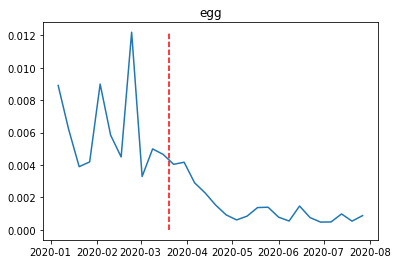

In [ ]:
y =  keydf_n[keydf_n.segment == '鸡蛋'].rate
y_max = np.max(y)
plt.plot(day_list, y )#添加label设置图例名称
plt.vlines(pd.to_datetime('2020-3-20'), 0,y_max, colors = "r", linestyles = "dashed")
plt.title('egg')

Text(0.5, 1.0, 'oil')

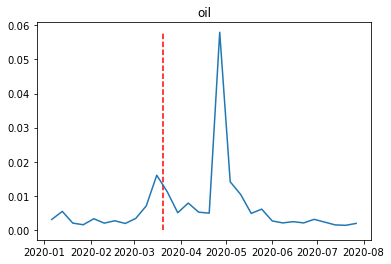

In [ ]:
y =  keydf_n[keydf_n.segment == '原油'].rate
y_max = np.max(y)
plt.plot(day_list, y )#添加label设置图例名称
plt.vlines(pd.to_datetime('2020-3-20'), 0,y_max, colors = "r", linestyles = "dashed")
plt.title('oil')

Text(0.5, 1.0, 'covid19')

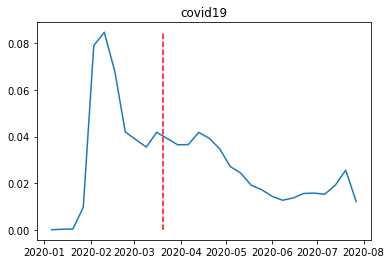

In [ ]:
y =  keydf_n[keydf_n.segment == '疫情'].rate
y_max = np.max(y)
plt.plot(day_list, y)#添加label设置图例名称
plt.vlines(pd.to_datetime('2020-3-20'), 0, y_max, colors = "r", linestyles = "dashed")
plt.title('covid19')

Text(0.5, 1.0, 'covid19')

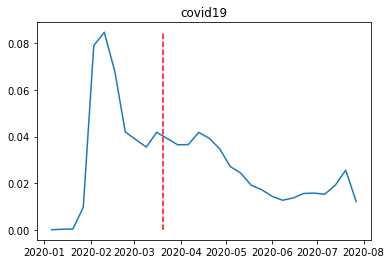

In [ ]:
y =  keydf_n[keydf_n.segment == '疫情'].rate
y_max = np.max(y)
plt.plot(day_list, y)#添加label设置图例名称
plt.vlines(pd.to_datetime('2020-3-20'), 0, y_max, colors = "r", linestyles = "dashed")
plt.title('covid19')

Text(0.5, 1.0, '5G')

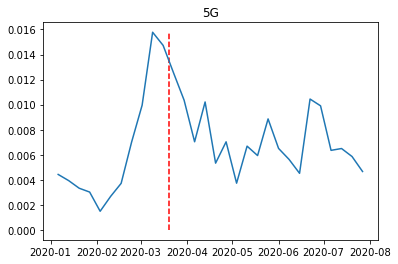

In [ ]:
y =  keydf_n[keydf_n.segment == '5G'].rate
y_max = np.max(y)
plt.plot(day_list, y)#添加label设置图例名称
plt.vlines(pd.to_datetime('2020-3-20'), 0, y_max, colors = "r", linestyles = "dashed")
plt.title('5G')

Text(0.5, 1.0, 'smile')

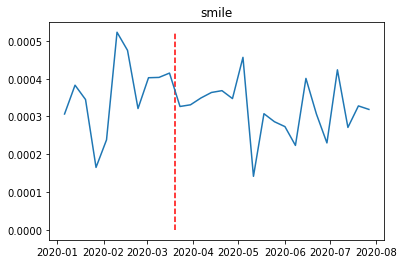

In [ ]:
y =  keydf_v[keydf_v.segment == '微笑'].rate
y_max = np.max(y)
plt.plot(day_list, y)#添加label设置图例名称
plt.vlines(pd.to_datetime('2020-3-20'), 0, y_max, colors = "r", linestyles = "dashed")
plt.title('smile')

Text(0.5, 1.0, 'laugh')

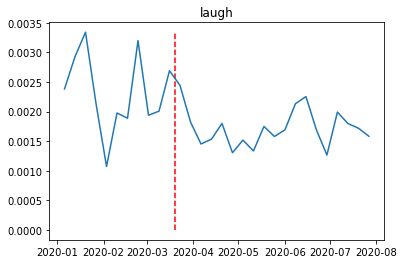

In [ ]:
y =  keydf_v[keydf_v.segment == '大笑'].rate
y_max = np.max(y)
plt.plot(day_list, y)#添加label设置图例名称
plt.vlines(pd.to_datetime('2020-3-20'), 0, y_max, colors = "r", linestyles = "dashed")
plt.title('laugh')

Text(0.5, 1.0, 'up')

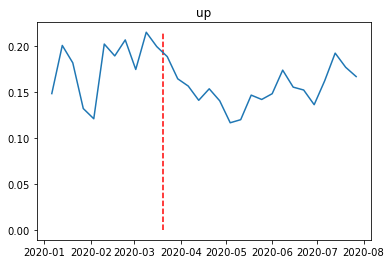

In [ ]:
y =  keydf_v[keydf_v.segment == '涨'].rate
y_max = np.max(y)
plt.plot(day_list, y)#添加label设置图例名称
plt.vlines(pd.to_datetime('2020-3-20'), 0, y_max, colors = "r", linestyles = "dashed")
plt.title('up')

Text(0.5, 1.0, 'down')

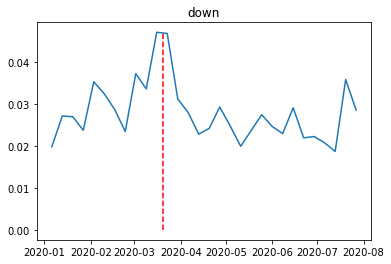

In [ ]:
y =  keydf_v[keydf_v.segment == '跌'].rate
y_max = np.max(y)
plt.plot(day_list, y)#添加label设置图例名称
plt.vlines(pd.to_datetime('2020-3-20'), 0, y_max, colors = "r", linestyles = "dashed")
plt.title('down')

In [ ]:
plt.plot(day_list, keydf_v[keydf_v.segment == '跌'].rate )#添加label设置图例名称
plt.title('down')

# Correlation analysis

In [ ]:
keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

# Creat words frequency dataframe
keydf = pd.DataFrame()
for i in range(len(keywords)):
    try:
        df = words_stat3[words_stat3.segment==keywords[i]]
        df['rate'] = df.计数/lenth_weekly
    except:
        print(keywords[i])
    keydf = pd.concat([keydf, df]).reset_index(drop=True)


<ipython-input-11-164dd71dda3d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df.计数/lenth_weekly


数字货币


In [ ]:
day_list=[]
for i in range(30):
    wk = '2020-W' + (str(i+1)) + '-1'
    day_list.append(datetime.datetime.strptime(wk, '%Y-W%W-%w'))
day_list

[datetime.datetime(2020, 1, 6, 0, 0),
 datetime.datetime(2020, 1, 13, 0, 0),
 datetime.datetime(2020, 1, 20, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 17, 0, 0),
 datetime.datetime(2020, 2, 24, 0, 0),
 datetime.datetime(2020, 3, 2, 0, 0),
 datetime.datetime(2020, 3, 9, 0, 0),
 datetime.datetime(2020, 3, 16, 0, 0),
 datetime.datetime(2020, 3, 23, 0, 0),
 datetime.datetime(2020, 3, 30, 0, 0),
 datetime.datetime(2020, 4, 6, 0, 0),
 datetime.datetime(2020, 4, 13, 0, 0),
 datetime.datetime(2020, 4, 20, 0, 0),
 datetime.datetime(2020, 4, 27, 0, 0),
 datetime.datetime(2020, 5, 4, 0, 0),
 datetime.datetime(2020, 5, 11, 0, 0),
 datetime.datetime(2020, 5, 18, 0, 0),
 datetime.datetime(2020, 5, 25, 0, 0),
 datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 8, 0, 0),
 datetime.datetime(2020, 6, 15, 0, 0),
 datetime.datetime(2020, 6, 22, 0, 0),
 datetime.datetime(2020, 6, 29, 0

In [ ]:
def get_pictures(str1,str2):
    y1 =  keydf[keydf.segment == str1].rate
    y2 = keydf[keydf.segment == str2].rate

    plt.plot(day_list, y1,linestyle='--',label='word1')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.twinx()
    plt.plot(day_list, y2,color='red',label='word2')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

    plt.show()

In [ ]:
def get_correlations(str1,str2):
    y1 =  keydf[keydf.segment == str1].rate
    y2 = keydf[keydf.segment == str2].rate

    # yb1 = np.round(y1.rolling(window=2,min_periods=1).mean(), 2)
    # yb2 = np.round(y2.rolling(window=2,min_periods=1).mean(), 2)
    d1 =  pd.DataFrame(y1).reset_index(drop = True)
    d2 = pd.DataFrame(y2).reset_index(drop = True)
    pears = 'The whole pearson correaltion is ' + str(d1.rate.corr(d2.rate))
    sp = 'The whole spearman correaltion is ' +str(d1.rate.corr(d2.rate,'spearman'))
    kd = 'The whole kendall correaltion is ' + str(d1.rate.corr(d2.rate,'kendall'))

    mine = MINE(alpha=0.6, c=15)
    mine.compute_score(y1, y2)
    mic = 'The whole MIC is ' + str(mine.mic())
    

    y11 = y1.reset_index()
    y11 = y11['rate']
    y1a = y11[:13]
    y21 = y2.reset_index()
    y21 = y21['rate']
    y2a = y21[:13]
    d1 =  pd.DataFrame(y1a).reset_index(drop = True)
    d2 = pd.DataFrame(y2a).reset_index(drop = True)
    pears1 = 'before w12 is ' + str(d1.rate.corr(d2.rate))
    sp1 =  'before w12 is '+ str(d1.rate.corr(d2.rate,'spearman'))
    kd1 = 'before w12 is ' + str(d1.rate.corr(d2.rate,'kendall'))
    mine = MINE(alpha=0.6, c=15)
    mine.compute_score(y1a, y2a)
    mic1 = 'MIC before week 12 (included) is ' + str(mine.mic())
    
    y11 = y1.reset_index()
    y11 = y11['rate']
    y1a = y11[13:]
    y21 = y2.reset_index()
    y21 = y21['rate']
    y2a = y21[13:]
    d1 =  pd.DataFrame(y1a).reset_index(drop = True)
    d2 = pd.DataFrame(y2a).reset_index(drop = True)
    pears2 = 'after w12 is ' + str(d1.rate.corr(d2.rate))
    sp2 =  'after w12 is ' + str(d1.rate.corr(d2.rate,'spearman'))
    kd2 = 'after w12 is ' + str(d1.rate.corr(d2.rate,'kendall'))
    mine = MINE(alpha=0.6, c=15)
    mine.compute_score(y1a, y2a)
    mic2 = 'MIC after week 12 is ' +str(mine.mic())

    print(mic + '; ' + mic1 + '; ' + mic2 )
    print(pears + '; ' + pears1 + '; ' + pears2)
    print(sp + '; ' + sp1 + '; ' + sp2)
    print(kd + '; ' + kd1 + '; ' + kd2)


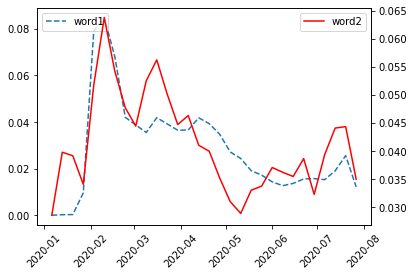

The whole MIC is 0.7303078961588813; MIC before week 12 (included) is 0.6771344174636726; MIC after week 12 is 0.34929372233065203
The whole pearson correaltion is 0.7763293673582529; before w12 is 0.8613401379427369; after w12 is 0.34214927509760196
The whole spearman correaltion is 0.7116796440489432; before w12 is 0.8241758241758241; after w12 is 0.24754901960784317
The whole kendall correaltion is 0.503448275862069; before w12 is 0.6410256410256409; after w12 is 0.1764705882352941


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
get_pictures('疫情','医疗')
get_correlations('疫情','医疗')

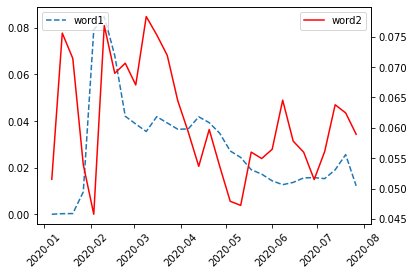

The whole MIC is 0.3517930639547578; MIC before week 12 (included) is 0.1103601440597768; MIC after week 12 is 0.34929372233065203
The whole pearson correaltion is 0.19520932777540534; before w12 is 0.040056931241710204; after w12 is -0.15988537279554263
The whole spearman correaltion is 0.2040044493882091; before w12 is 0.07142857142857142; after w12 is -0.25490196078431376
The whole kendall correaltion is 0.12183908045977011; before w12 is 0.07692307692307691; after w12 is -0.24999999999999997


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
get_pictures('疫情','不确定性')
get_correlations('疫情','不确定性')

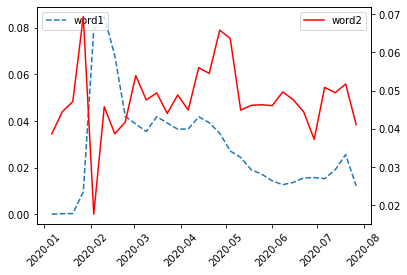

The whole MIC is 0.2637106097050172; MIC before week 12 (included) is 0.1955533481920762; MIC after week 12 is 0.34929372233065203
The whole pearson correaltion is -0.2701793448160346; before w12 is -0.4556225755499712; after w12 is 0.577039513324806
The whole spearman correaltion is -0.0064516129032258064; before w12 is -0.23626373626373626; after w12 is 0.5073529411764706
The whole kendall correaltion is 0.006896551724137931; before w12 is -0.15384615384615383; after w12 is 0.3529411764705882


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
get_pictures('疫情','风险')
get_correlations('疫情','风险')

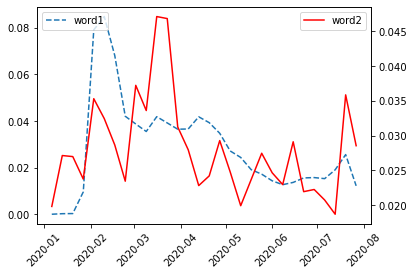

The whole MIC is 0.514524702772666; MIC before week 12 (included) is 0.46666279373280384; MIC after week 12 is 0.15618502398692874
The whole pearson correaltion is 0.4497272440550477; before w12 is 0.4041893215293689; after w12 is 0.13968769237604756
The whole spearman correaltion is 0.4651835372636262; before w12 is 0.46703296703296704; after w12 is 0.07107843137254903
The whole kendall correaltion is 0.31494252873563217; before w12 is 0.3589743589743589; after w12 is 0.02941176470588235


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('疫情','跌')
get_correlations('疫情','跌')

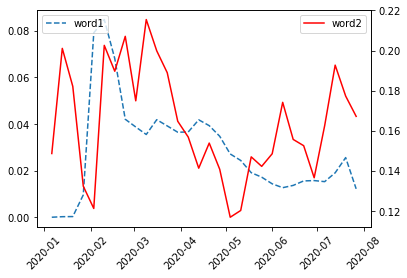

The whole MIC is 0.1916661760404042; MIC before week 12 (included) is 0.23095987440365312; MIC after week 12 is 0.1861381990467906
The whole pearson correaltion is 0.15967329548518086; before w12 is 0.07015718723724114; after w12 is -0.26343283218109875
The whole spearman correaltion is 0.185761957730812; before w12 is 0.19780219780219782; after w12 is -0.3651960784313726
The whole kendall correaltion is 0.10344827586206898; before w12 is 0.17948717948717946; after w12 is -0.2794117647058823


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('疫情','涨')
get_correlations('疫情','涨')

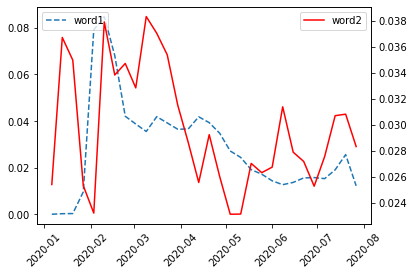

The whole MIC is 0.31501296236274995; MIC before week 12 (included) is 0.1103601440597768; MIC after week 12 is 0.1861381990467906
The whole pearson correaltion is 0.23392847544875986; before w12 is 0.0890652883606759; after w12 is -0.15299885939883548
The whole spearman correaltion is 0.24938820912124582; before w12 is 0.0934065934065934; after w12 is -0.24019607843137256
The whole kendall correaltion is 0.15402298850574714; before w12 is 0.07692307692307691; after w12 is -0.2205882352941176


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('疫情','乐观')
get_correlations('疫情','乐观')

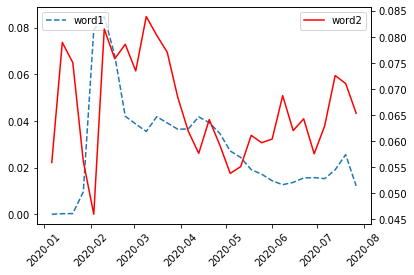

The whole MIC is 0.21913593449264737; MIC before week 12 (included) is 0.23095987440365312; MIC after week 12 is 0.1861381990467906
The whole pearson correaltion is 0.16360269184386303; before w12 is 0.05149449665086822; after w12 is -0.2511502767019131
The whole spearman correaltion is 0.22981090100111232; before w12 is 0.20329670329670327; after w12 is -0.36274509803921573
The whole kendall correaltion is 0.14942528735632182; before w12 is 0.17948717948717946; after w12 is -0.24999999999999997


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('疫情','创业')
get_correlations('疫情','创业')

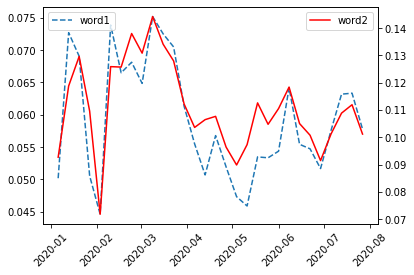

The whole MIC is 0.9182958340544897; MIC before week 12 (included) is 0.46666279373280384; MIC after week 12 is 0.31653835090715127
The whole pearson correaltion is 0.8825463514326245; before w12 is 0.8842667546817058; after w12 is 0.6980609915212261
The whole spearman correaltion is 0.8531701890989989; before w12 is 0.6868131868131868; after w12 is 0.5857843137254902
The whole kendall correaltion is 0.664367816091954; before w12 is 0.5384615384615383; after w12 is 0.4264705882352941


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('白酒','科技')
get_correlations('白酒','科技')

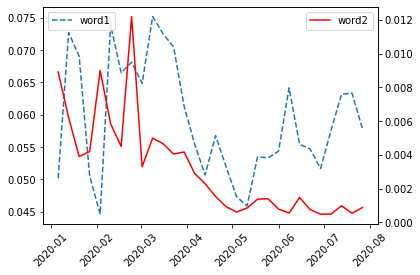

The whole MIC is 0.5330860799126497; MIC before week 12 (included) is 0.35998418235489427; MIC after week 12 is 0.14078143361499573
The whole pearson correaltion is 0.2981108459241213; before w12 is -0.2969459590418667; after w12 is -0.148998368337993
The whole spearman correaltion is 0.3348164627363737; before w12 is -0.027472527472527472; after w12 is -0.11029411764705883
The whole kendall correaltion is 0.2597701149425288; before w12 is 0.0; after w12 is -0.0588235294117647


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
get_pictures('白酒','鸡蛋')
get_correlations('白酒','鸡蛋')

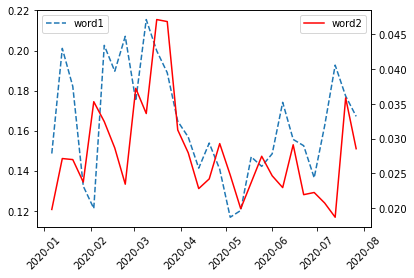

The whole MIC is 0.2502283386145067; MIC before week 12 (included) is 0.15462496545057766; MIC after week 12 is 0.09349869023672412
The whole pearson correaltion is 0.39114335317721705; before w12 is 0.23135517900648023; after w12 is 0.13472177340590075
The whole spearman correaltion is 0.3454949944382647; before w12 is 0.0934065934065934; after w12 is 0.07598039215686275
The whole kendall correaltion is 0.24597701149425286; before w12 is 0.10256410256410255; after w12 is 0.07352941176470587


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('涨','跌')
get_correlations('涨','跌')

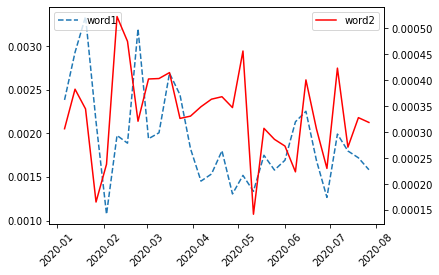

The whole MIC is 0.2998875833841061; MIC before week 12 (included) is 0.21881472361493515; MIC after week 12 is 0.06696192680347063
The whole pearson correaltion is 0.227989045769834; before w12 is 0.06075044695247064; after w12 is 0.2628108210462062
The whole spearman correaltion is 0.27875417130144603; before w12 is -0.07142857142857142; after w12 is 0.17156862745098042
The whole kendall correaltion is 0.19080459770114944; before w12 is -0.025641025641025637; after w12 is 0.10294117647058822


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('大笑','微笑')
get_correlations('大笑','微笑')

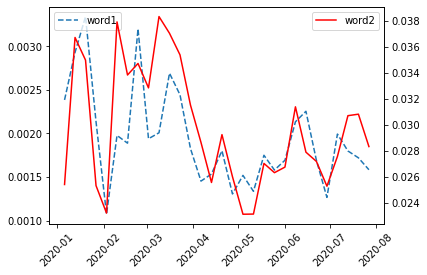

The whole MIC is 0.5972104013355726; MIC before week 12 (included) is 0.4964793754946902; MIC after week 12 is 0.5548894409556175
The whole pearson correaltion is 0.6667668611026702; before w12 is 0.4645997013557906; after w12 is 0.6045336693541896
The whole spearman correaltion is 0.6783092324805339; before w12 is 0.41208791208791207; after w12 is 0.6960784313725491
The whole kendall correaltion is 0.5218390804597701; before w12 is 0.282051282051282; after w12 is 0.5147058823529411


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('大笑','乐观')
get_correlations('大笑','乐观')

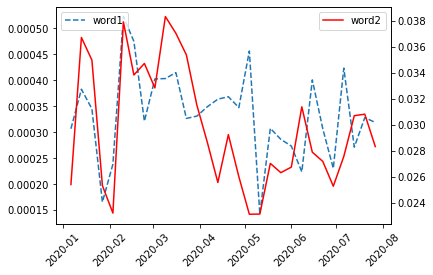

The whole MIC is 0.34385362804443786; MIC before week 12 (included) is 0.46666279373280384; MIC after week 12 is 0.12956798741832246
The whole pearson correaltion is 0.5138139518038937; before w12 is 0.76325131458868; after w12 is -0.005272281213765428
The whole spearman correaltion is 0.4981090100111235; before w12 is 0.7307692307692307; after w12 is -0.012254901960784315
The whole kendall correaltion is 0.38390804597701156; before w12 is 0.5897435897435896; after w12 is 0.0


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','数字货币','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('微笑','乐观')
get_correlations('微笑','乐观')

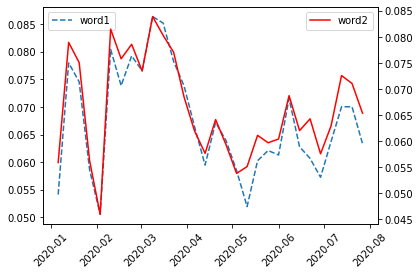

The whole MIC is 0.8163408331891022; MIC before week 12 (included) is 0.6771344174636726; MIC after week 12 is 0.4752766311586689
The whole pearson correaltion is 0.9631577030804829; before w12 is 0.975308853546617; after w12 is 0.8603984302634301
The whole spearman correaltion is 0.9559510567296997; before w12 is 0.9560439560439561; after w12 is 0.8039215686274511
The whole kendall correaltion is 0.8344827586206897; before w12 is 0.846153846153846; after w12 is 0.6323529411764706


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('政策','创业')
get_correlations('政策','创业')

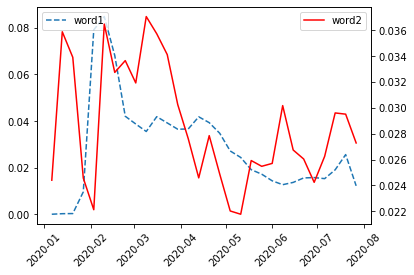

The whole MIC is 0.31501296236274995; MIC before week 12 (included) is 0.1103601440597768; MIC after week 12 is 0.1861381990467906
The whole pearson correaltion is 0.22206091496239444; before w12 is 0.06750725289066169; after w12 is -0.1611008980350344
The whole spearman correaltion is 0.2395995550611791; before w12 is 0.07142857142857142; after w12 is -0.24264705882352944
The whole kendall correaltion is 0.15402298850574714; before w12 is 0.07692307692307691; after w12 is -0.2205882352941176


<ipython-input-32-47b9cacb4653>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1, y2)
<ipython-input-32-47b9cacb4653>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(y1a, y2a)
<ipython-input-32-47b9cacb4653>:45: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

In [ ]:
# keywords = ['鸡蛋','原油','科技','医疗','5G','白酒','智能','创业','政策','概念','不确定性','风险','疫情','涨', '跌', '上涨','下跌','赚','赔','微笑','大笑','乐观','打新','免税','复苏']

get_pictures('疫情','打新')
get_correlations('疫情','打新')

# 分词（by id)

In [ ]:
detail = pd.read_excel('/home/afan/emotion_analysis/data/detail.xlsx')

In [ ]:
detail.isnull().sum()

_id                    0
read_num               0
comment_num            0
title                 15
detail_url        587683
author                 5
author_url        554745
pub_time               0
list_url          653203
id                     0
name                   0
code                   0
type                   0
page                   0
pub_time_str           0
pub_time_int           0
content            10500
content_images         0
dtype: int64

In [ ]:
qw = detail[['content','id']]
qwd = qw.dropna()

In [ ]:
qwd = qwd['id']
qwd

0         4f8d4e395621ccb6d5dc98c9e2f474a3
1         e3cfbc7dfa6a191599e9bbe50681a0a0
2         b4515ea4e862c95afe46eaaf2d720d96
3         ac1b11e3b14c9a56be92522ff150ef7c
4         e72c70a8f5faccd4336e0fb9a76e5765
                        ...               
652792    e7e2e19dbcbe23f8156eab9f0147e8e2
652793    7f91ebd71c1b9ba9c6774b54548a5cce
652794    8fb9ae0fbf10112d1b6d3d10e83ea339
652795    6890ead64019468e448cfe2463a8bd88
652796    fda959b011dc19c318005d6d243b5c0e
Name: id, Length: 642703, dtype: object

In [ ]:
qwdic = qwd.to_dict()
qwdic

In [ ]:
dict_new=dict(zip(qwdic.values(),qwdic.keys()))
dict_new

In [ ]:
with open("/home/afan/emotion_analysis/data/processed_data/post_dict.p", "wb") as fp:   #Pickling
    pickle.dump(dict_new, fp, protocol = pickle.HIGHEST_PROTOCOL)  

In [ ]:
with open("/home/afan/emotion_analysis/data/processed_data/post_dict.p", "rb") as fp:   #Pickling
    mydic=pickle.load(fp)  

In [86]:
len(mydic)

642703

In [4]:
detail['index'] = detail.index

In [5]:
detail_copy = detail[['index','content']]

In [6]:
detail_copy = detail_copy.dropna().reset_index(drop = True)
detail_copy

,index,content
0,0,含德之厚者，比于赤子。一年时光一晃就过，记得2019年第一帖就奉献了华丽的一章，虽然不是新帖...
1,1,周四鸡蛋会跌停吗？
2,2,祝福慈文2020成为超级大牛股！东霞与骏马齐飞，慈文共华章一色。勇立潮头作品一流，一见惊鸿再...
3,3,2020静待花开
4,4,祝曙光的朋友们新年快乐，20年身体健康投资顺利
...,...,...
642698,652792,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...
642699,652793,买一手多，涨一个点，能赚多少钱
642700,652794,哎，割肉了，不碰它了
642701,652795,七位副总裁突击成股东来源：界面新闻 继创维集团(0751.HK)、比亚迪(002594.S...


In [13]:
detail_copy[29991:]

,index,content
29991,30488,0
29992,30489,开高走的时候，傻眼了。我15元成本，在32-33回调的时候筹码给收走了。星期五高开高走的时候...
29993,30490,做接盘侠了，资金一直流出，流A股果然是A股，走A字形，日线严重背离。别忽悠散户去做接盘侠了，...
29994,30491,回落概率蛮高的，前天昨天低位买下周一二会反抽上涨两天，鉴于消息面题材已落地，反抽回落概率蛮高...
29995,30492,中枢是缠论里面的一个名词，缠论并不是绝对正确，任何一种技术都是辅助我们来分析，分析的目的就是...
...,...,...
642698,652792,说明价值投资才是上班族正确的投如果从我刚入股市时就一直持有美的，我的收益是6倍，说明价值投资...
642699,652793,买一手多，涨一个点，能赚多少钱
642700,652794,哎，割肉了，不碰它了
642701,652795,七位副总裁突击成股东来源：界面新闻 继创维集团(0751.HK)、比亚迪(002594.S...


In [15]:
c = str(0)
emoji_pattern.findall(c)

[]

In [18]:
# 分词，筛选表情
emoji_pattern = re.compile(r'\[.\]|\[..\]|\[...\]|\[....\]')
emojis = []
words = []
for i in tqdm(range(len(detail_copy[:200000])), position=0, leave=True):
    row = detail_copy.iloc[i]
    c = str(row.content)
    try:
        s = SnowNLP(c)
        w = s.words
    except:
        print('error')
    try:
        words.append(w)
    except:
        print('Error')
    emoji = emoji_pattern.findall(c) #从字符串中查找所有符合表情格式的内容
    emo = []
    for i in range(len(emoji)):
        it = emoji[i][1:-1]
        emo.append(it)
    emojis.append(emo)


words_df = pd.DataFrame({'words': words})
words_df['emoji'] = emojis
words_df['index'] = detail_copy['index'][:200000]


100%|██████████| 200000/200000 [3:16:42<00:00, 16.95it/s]


In [19]:
words_df

,words,emoji,index
0,"[含德, 之厚, 者, ，, 比于, 赤子, 。, 一, 年, 时光, 一, 晃, 就, 过...",[],0
1,"[周四, 鸡蛋, 会, 跌, 停, 吗, ？]",[],1
2,"[祝福, 慈, 文, 2020, 成为, 超级大, 牛, 股, ！, 东霞, 与骏, 马齐飞...",[],2
3,"[2020, 静待, 花, 开]",[],3
4,"[祝, 曙光, 的, 朋友, 们, 新年, 快乐, ，20, 年, 身体, 健康, 投资, 顺利]",[],4
...,...,...,...
199995,"[就, 没有, 勇气, 拿, 几, 天]",[],203399
199996,"[常, 山, 现在, 根本, 连, 半山腰, 都, 没, 到, ！, 满, 仓, 打, 进,...",[],203401
199997,"[[, 哭, ][, 哭, ], 我, 的, 心态, 崩, 了, ，, 以为, 今天, 会,...","[哭, 哭]",203402
199998,"[历史, 低位, ，, 差, 一阵风, ，3000, 点, 以下, 随便, 买]",[],203403


In [20]:
df2 = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/p2.csv')
df3 = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/p3.csv')

In [22]:
df = pd.concat([words_df,df2,df3]).reset_index(drop = True)
df

,words,emoji,index
0,"[含德, 之厚, 者, ，, 比于, 赤子, 。, 一, 年, 时光, 一, 晃, 就, 过...",[],0
1,"[周四, 鸡蛋, 会, 跌, 停, 吗, ？]",[],1
2,"[祝福, 慈, 文, 2020, 成为, 超级大, 牛, 股, ！, 东霞, 与骏, 马齐飞...",[],2
3,"[2020, 静待, 花, 开]",[],3
4,"[祝, 曙光, 的, 朋友, 们, 新年, 快乐, ，20, 年, 身体, 健康, 投资, 顺利]",[],4
...,...,...,...
642698,"['说明', '价值', '投资', '才', '是', '上班族', '正确', '的',...",[],652792
642699,"['买', '一手', '多', '，', '涨', '一个', '点', '，', '能'...",[],652793
642700,"['哎', '，', '割肉', '了', '，', '不', '碰', '它', '了']",[],652794
642701,"['七', '位', '副', '总裁', '突击', '成', '股东', '来源', '...",[],652795


In [23]:
df.to_csv('/home/afan/emotion_analysis/data/processed_data/details_seg_.csv',index=False)

In [3]:
df = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/details_seg_.csv')

In [4]:
df

,words,emoji,index
0,"['含德', '之厚', '者', '，', '比于', '赤子', '。', '一', '...",[],0
1,"['周四', '鸡蛋', '会', '跌', '停', '吗', '？']",[],1
2,"['祝福', '慈', '文', '2020', '成为', '超级大', '牛', '股'...",[],2
3,"['2020', '静待', '花', '开']",[],3
4,"['祝', '曙光', '的', '朋友', '们', '新年', '快乐', '，20',...",[],4
...,...,...,...
642698,"['说明', '价值', '投资', '才', '是', '上班族', '正确', '的',...",[],652792
642699,"['买', '一手', '多', '，', '涨', '一个', '点', '，', '能'...",[],652793
642700,"['哎', '，', '割肉', '了', '，', '不', '碰', '它', '了']",[],652794
642701,"['七', '位', '副', '总裁', '突击', '成', '股东', '来源', '...",[],652795


In [5]:
df = df.rename(columns = {'words':'word'})

In [37]:
df

,word,emoji,index
0,"['含德', '之厚', '者', '，', '比于', '赤子', '。', '一', '...",[],0
1,"['周四', '鸡蛋', '会', '跌', '停', '吗', '？']",[],1
2,"['祝福', '慈', '文', '2020', '成为', '超级大', '牛', '股'...",[],2
3,"['2020', '静待', '花', '开']",[],3
4,"['祝', '曙光', '的', '朋友', '们', '新年', '快乐', '，20',...",[],4
...,...,...,...
642698,"['说明', '价值', '投资', '才', '是', '上班族', '正确', '的',...",[],652792
642699,"['买', '一手', '多', '，', '涨', '一个', '点', '，', '能'...",[],652793
642700,"['哎', '，', '割肉', '了', '，', '不', '碰', '它', '了']",[],652794
642701,"['七', '位', '副', '总裁', '突击', '成', '股东', '来源', '...",[],652795


In [6]:
df.index = df['index']
df

,word,emoji,index
index,,,
0,"['含德', '之厚', '者', '，', '比于', '赤子', '。', '一', '...",[],0
1,"['周四', '鸡蛋', '会', '跌', '停', '吗', '？']",[],1
2,"['祝福', '慈', '文', '2020', '成为', '超级大', '牛', '股'...",[],2
3,"['2020', '静待', '花', '开']",[],3
4,"['祝', '曙光', '的', '朋友', '们', '新年', '快乐', '，20',...",[],4
...,...,...,...
652792,"['说明', '价值', '投资', '才', '是', '上班族', '正确', '的',...",[],652792
652793,"['买', '一手', '多', '，', '涨', '一个', '点', '，', '能'...",[],652793
652794,"['哎', '，', '割肉', '了', '，', '不', '碰', '它', '了']",[],652794


In [7]:
df = df [['word','emoji']]
df

,word,emoji
index,,
0,"['含德', '之厚', '者', '，', '比于', '赤子', '。', '一', '...",[]
1,"['周四', '鸡蛋', '会', '跌', '停', '吗', '？']",[]
2,"['祝福', '慈', '文', '2020', '成为', '超级大', '牛', '股'...",[]
3,"['2020', '静待', '花', '开']",[]
4,"['祝', '曙光', '的', '朋友', '们', '新年', '快乐', '，20',...",[]
...,...,...
652792,"['说明', '价值', '投资', '才', '是', '上班族', '正确', '的',...",[]
652793,"['买', '一手', '多', '，', '涨', '一个', '点', '，', '能'...",[]
652794,"['哎', '，', '割肉', '了', '，', '不', '碰', '它', '了']",[]


In [8]:
df1 = df.T
df1

index,0,1,2,3,4,5,6,7,8,9,...,652786,652787,652788,652789,652790,652792,652793,652794,652795,652796
word,"['含德', '之厚', '者', '，', '比于', '赤子', '。', '一', '...","['周四', '鸡蛋', '会', '跌', '停', '吗', '？']","['祝福', '慈', '文', '2020', '成为', '超级大', '牛', '股'...","['2020', '静待', '花', '开']","['祝', '曙光', '的', '朋友', '们', '新年', '快乐', '，20',...","['推土机', '式', '上', '升', '，', '这种', '走势', '是', '...","['新年', '钟声', '敲响', '之际', '，', '开', '新年', '第一',...","['回', '落后', '，', '见', '75', '元', '必', '买', '！']","['胜利', '][', '胜利', '][', '胜利', ']', '我', '只', ...","['百货', '都', '拿', '不', '下', '，', '名声', '就', '臭'...",...,"['大', '了', ']', '真', '看', '的起', '我', '这', '一手'...","['多', '起来']","['5702', '收盘']","['。', '国家', '出', '手', '了', '，', '明天', '大家', '就...","['最后', '一下', '了', '，', '做', '多', '的', '准备', '梭...","['说明', '价值', '投资', '才', '是', '上班族', '正确', '的',...","['买', '一手', '多', '，', '涨', '一个', '点', '，', '能'...","['哎', '，', '割肉', '了', '，', '不', '碰', '它', '了']","['七', '位', '副', '总裁', '突击', '成', '股东', '来源', '...","['是', '主力', '吗', '？', '越是', '慢', '涨越', '不跌', '..."
emoji,[],[],[],[],[],[],[],[],"['胜利', '胜利']",[],...,[],[],[],[],[],[],[],[],[],[]


In [9]:
df1.index=['words','emoji']

In [10]:
df1

index,0,1,2,3,4,5,6,7,8,9,...,652786,652787,652788,652789,652790,652792,652793,652794,652795,652796
words,"['含德', '之厚', '者', '，', '比于', '赤子', '。', '一', '...","['周四', '鸡蛋', '会', '跌', '停', '吗', '？']","['祝福', '慈', '文', '2020', '成为', '超级大', '牛', '股'...","['2020', '静待', '花', '开']","['祝', '曙光', '的', '朋友', '们', '新年', '快乐', '，20',...","['推土机', '式', '上', '升', '，', '这种', '走势', '是', '...","['新年', '钟声', '敲响', '之际', '，', '开', '新年', '第一',...","['回', '落后', '，', '见', '75', '元', '必', '买', '！']","['胜利', '][', '胜利', '][', '胜利', ']', '我', '只', ...","['百货', '都', '拿', '不', '下', '，', '名声', '就', '臭'...",...,"['大', '了', ']', '真', '看', '的起', '我', '这', '一手'...","['多', '起来']","['5702', '收盘']","['。', '国家', '出', '手', '了', '，', '明天', '大家', '就...","['最后', '一下', '了', '，', '做', '多', '的', '准备', '梭...","['说明', '价值', '投资', '才', '是', '上班族', '正确', '的',...","['买', '一手', '多', '，', '涨', '一个', '点', '，', '能'...","['哎', '，', '割肉', '了', '，', '不', '碰', '它', '了']","['七', '位', '副', '总裁', '突击', '成', '股东', '来源', '...","['是', '主力', '吗', '？', '越是', '慢', '涨越', '不跌', '..."
emoji,[],[],[],[],[],[],[],[],"['胜利', '胜利']",[],...,[],[],[],[],[],[],[],[],[],[]


In [11]:
dic1 = df1.to_dict()

In [12]:
with open("/home/afan/emotion_analysis/data/processed_data/post_partition_dict.p", "wb") as fp:   #Pickling
    pickle.dump(dic1, fp, protocol = pickle.HIGHEST_PROTOCOL)  

In [28]:
POST_PARTITION_PATH = '/home/afan/emotion_analysis/data/processed_data/post_partition_dict.p'
with open(POST_PARTITION_PATH, 'rb') as f:
    # {index: {'word':, 'emoji':}}
    post_partition_dict = pickle.load(f)


EOFError: Ran out of input

In [27]:
with open("/home/afan/emotion_analysis/data/processed_data/post_partition_dict.p", "rb") as fp:   #Pickling
    mydic=pickle.load(fp)  

EOFError: Ran out of input

In [89]:
mydic[post_df.loc[post_df['']==i].index[0]]['words']

NameError: name 'post_df' is not defined

In [29]:
f = open('/home/afan/emotion_analysis/data/processed_data/comment_date.p', 'rb')
# 使用load方法将数据从pkl文件中读取出来
c = pickle.load(f)
f.close()

In [31]:
c

,words,emoji
index,,
0,"[含德, 之厚, 者, ，, 比于, 赤子, 。, 一, 年, 时光, 一, 晃, 就, 过...",[]
1,"[周四, 鸡蛋, 会, 跌, 停, 吗, ？]",[]
2,"[祝福, 慈, 文, 2020, 成为, 超级大, 牛, 股, ！, 东霞, 与骏, 马齐飞...",[]
3,"[2020, 静待, 花, 开]",[]
4,"[祝, 曙光, 的, 朋友, 们, 新年, 快乐, ，20, 年, 身体, 健康, 投资, 顺利]",[]
...,...,...
652792,"['说明', '价值', '投资', '才', '是', '上班族', '正确', '的',...",[]
652793,"['买', '一手', '多', '，', '涨', '一个', '点', '，', '能'...",[]
652794,"['哎', '，', '割肉', '了', '，', '不', '碰', '它', '了']",[]


In [32]:
f = open('/home/afan/emotion_analysis/data/concat.p', 'rb')
# 使用load方法将数据从pkl文件中读取出来
c = pickle.load(f)
f.close()

In [30]:
df1 = pd.DataFrame.from_dict(c)
df1

,words,emoji
index,,
0,"[含德, 之厚, 者, ，, 比于, 赤子, 。, 一, 年, 时光, 一, 晃, 就, 过...",[]
1,"[周四, 鸡蛋, 会, 跌, 停, 吗, ？]",[]
2,"[祝福, 慈, 文, 2020, 成为, 超级大, 牛, 股, ！, 东霞, 与骏, 马齐飞...",[]
3,"[2020, 静待, 花, 开]",[]
4,"[祝, 曙光, 的, 朋友, 们, 新年, 快乐, ，20, 年, 身体, 健康, 投资, 顺利]",[]
...,...,...
652792,"['说明', '价值', '投资', '才', '是', '上班族', '正确', '的',...",[]
652793,"['买', '一手', '多', '，', '涨', '一个', '点', '，', '能'...",[]
652794,"['哎', '，', '割肉', '了', '，', '不', '碰', '它', '了']",[]
